# Data Analysis of US House Pricing

- The dataset used for the analysis is from - https://www.kaggle.com/farhankarim1/usa-house-prices#.
- Click [here](#factors) to jump straight onto the 10 factors affecting US Housing Prices.

## Step 1. Installing several needed package and gathering the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

## Step 2. Accessing the data

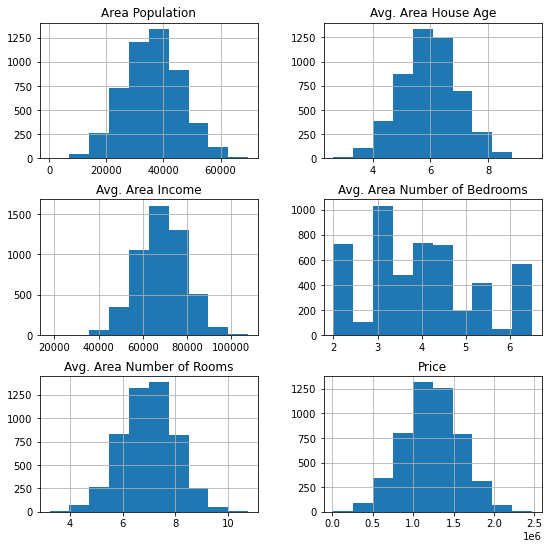

In [6]:
df.hist(figsize=(9,9));
#constructing histogram to know the distribution of the data

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


A brief description of all the features present in the dataset;
- Avg. Area Income - Specifies the average income in a specific area grouped by the Address column
- Avg. Area House Age - Specifies the average age of the house grouped by Address column
- Avg. Area Number of Rooms - Specifies the average number of beedrooms grouped by Address column
- Area Population - Specifies the population of the area grouped by Address
- Price - The price of the house
- Address - Address of the house

In [8]:
df.info()
#to print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Inferences from the info() that is to be 

- Rename columns
- Shortening Address data

## Step 3 Cleaning Data

#### Define

- Rename column names that is to replace spaces by underscore for dot notation access
- Clean Address column just taking the zipcode

We can now visualise these parameters to see how specific parameters affect the pricing.

#### The Code

In [10]:
df.columns = df.columns.str.replace(' ','_')
df.head()
df.rename(columns = {'Avg._Area_Income' : 'Avg_Area_Income', 
                     'Avg._Area_House_Age' : 'Avg_Area_House_Age', 
                     'Avg._Area_Number_of_Rooms' : 'Avg_Number_Rooms', 
                     'Avg._Area_Number_of_Bedrooms' : 'Avg_Number_bedrooms'}, inplace=True)
df.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Number_Rooms,Avg_Number_bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
df['zip'] = df['Address'].str.extract(r'(\d{5}\-?\d{0,4})') #using regex here
df.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Number_Rooms,Avg_Number_bedrooms,Area_Population,Price,Address,zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,09386


## Step 4 Visualizing Data

### As we know before solving any problem you should ask write questions.

1. Does the house age affect the pricing? 
<a id='ageprice'></a>

Text(0.5, 1.0, 'Age - Price Relation')

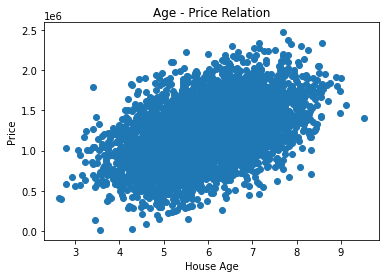

In [16]:
plt.scatter(x=df['Avg_Area_House_Age'], y=df['Price'])
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('Age - Price Relation')

From the above scatterplot, we can observe that the house age and price have a positive correlation. This means that as the age of the house increases, the price of the house also tends to increase.

2. Does the average number of rooms affect pricing?
<a id='roomprice'></a>

Text(0.5, 1.0, 'Rooms - Price Relation')

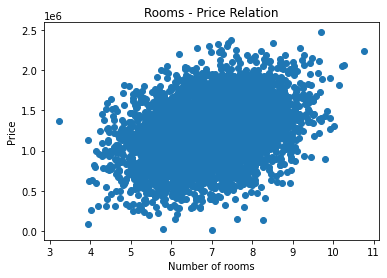

In [17]:
plt.scatter(x=df['Avg_Number_Rooms'], y=df['Price'])
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.title('Rooms - Price Relation')

The above scatterplot shows a positive correlation between price and number of rooms. This means that the price increases with an increase in the number of bedrooms.

3. Which zipcode has the highest house price?
<a id='areaprice'></a>

In [18]:
max_price = df.Price.max()
df.query('Price == {}'.format(max_price))

,Avg_Area_Income,Avg_Area_House_Age,Avg_Number_Rooms,Avg_Number_bedrooms,Area_Population,Price,Address,zip
465,90592.469609,7.700132,9.708803,5.19,37223.876167,2.469066e+06,USNS Vargas\nFPO AE 56319-6904,56319-6904


4. Does the average area income affect the housing prices?
<a id='averageincome'></a>

In [19]:
max_area_income = df['Avg_Area_Income'].max()
df.query('Avg_Area_Income == {}'.format(max_area_income))

,Avg_Area_Income,Avg_Area_House_Age,Avg_Number_Rooms,Avg_Number_bedrooms,Area_Population,Price,Address,zip
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205",41017


In [22]:
average_price = df.Price.mean()
average_price

2332111 > average_price #lets say

True

Hence this shows that the the area with an average income of \$107701, the house price is greater than the average house price.

## 5. Conclusions

The house prices are dependent on the following factors;<br>
- Age of the house
    * As seen [here](#ageprice), we can observe that as the age increases, the price of the house also increases. The graph shows a positive correlation.
- Average number of rooms
    * As seen [here](#roomprice), we can observe that as the number of rooms increases, the price of the house also increases. The graph shows a positive correlation.
- Area of the house
    * As seen [here](#areaprice), we can observe that the area having highest price of the house is in __56319-6904__ zip code. This house contains almost __10 bedrooms with an area of 5.19 sq/m & is approximately 7.8 years old__.
- Average area income
    * As seen [here](#averageincome), we can observe that the locality with an average income greater than \$100000, the house prices in that locality are greater than the average house prices. <br>
    
### __Limitations__
- This dataset is small & other details such as interest rates, neighborhood comps, employment details, surrounding schools (quality of education) and a few more details are missing which would have a huge impact on our analysis.

# 10 Factors Affecting US House Prices
<a id='factors'></a>

1. Age of the house (Condition of the house):
    * Typically, homes that are newer appraise at a higher value. The fact that critical parts of the house, like plumbing, electrical, the roof, and appliances are newer and therefore less likely to break down, can generate savings for a buyer. For example, if a roof has a 20-year warranty, that’s money an owner will save over the next two decades, compared to an older home that may need a roof replaced in just a few years. However, this is not the case in our analysis. In our analysis, the price of the house seems to grow as it grows older. <br></br>


2. Number of rooms (Usable space):
    * When estimating your home’s market value, size is an important element to consider, since a bigger home can positively impact its valuation. The value of a home is roughly estimated in price per square foot — the sales price divided by the square footage of the home. In addition to square footage, a home’s usable space matters when determining its value. Garages, attics, and unfinished basements are generally not counted in usable square footage. So if you have a 2,000-square-foot home with a 600-square-foot garage, that’s only 1,400-square-feet of livable space. Livable space is what is most important to buyers and appraisers. Bedrooms and bathrooms are most highly valued, so the more beds and baths your home offers, the more your home is generally worth. However these trends are very locally specific. In our analysis, as the number of rooms increase, the price of the rooms also are seen to be increasing.
    

3. Area of the house:
    * When estimating your home’s market value, size is an important element to consider, since a bigger home can positively impact its valuation. The value of a home is roughly estimated in price per square foot — the sales price divided by the square footage of the home. In addition to square footage, a home’s usable space matters when determining its value. Garages, attics, and unfinished basements are generally not counted in usable square footage. So if you have a 2,000-square-foot home with a 600-square-foot garage, that’s only 1,400-square-feet of livable space.


4. Economic growth:
    * Demand for housing is dependent upon income. With higher economic growth and rising incomes, people will be able to spend more on houses; this will increase demand and push up prices. In fact, demand for housing is often noted to be income elastic (luxury good); rising incomes leading to a bigger % of income being spent on houses. Similarly, in a recession, falling incomes will mean people can’t afford to buy and those who lose their job may fall behind on their mortgage payments and end up with their home repossessed. In our analysis, the area with a higher income shows that the house prices are greater than the average home price.
    

5. Geographical factors:
    * Many housing markets are highly geographical. For example, national house prices may be falling, but some areas (e.g. London, Oxford) may still see rising prices. Desirable areas can buck market trends as demand is high, and supply limited. For example, houses near good schools or a good rail link may have a significant premium to other areas. 
    

6. Interest rates:
    * Interest rates affect the cost of monthly mortgage payments. A period of high-interest rates will increase cost of mortgage payments and will cause lower demand for buying a house. High-interest rates make renting relatively more attractive compared to buying. Interest rates have a bigger effect if homeowners have large variable mortgages.


7. Mortgage availability:
    * In the boom years of 1996-2006, many banks were very keen to lend mortgages. They allowed people to borrow large income multiples (e.g. five times income). Also, banks required very low deposits (e.g. 100% mortgages). This ease of getting a mortgage meant that demand for housing increased as more people were now able to buy. However, since the credit crunch of 2007, banks and building societies struggled to raise funds for lending on the money markets. Therefore, they have tightened their lending criteria requiring a bigger deposit to buy a house. This has reduced the availability of mortgages and demand fell.
    

8. Supply:
    * A shortage of supply pushes up prices. Excess supply will cause prices to fall. The supply of housing depends on existing stock and new house builds. Supply of housing tends to be quite inelastic because to get planning permission and build houses is a time-consuming process. 
    

9. Affordability/house prices to earnings:
    * The ratio of house prices to earnings influences the demand. As house prices rise relative to income, you would expect fewer people to be able to afford. Another way of looking at the affordability of housing is to look at the percentage of take-home pay that is spent on mortgages. This takes into account both house prices, but mainly interest rates and the cost of monthly mortgage payments.
    

10. Demographic Factors
    * Apart from the economic factors affecting housing market, there are some demographic factors too. The number of households in the US has grown, and there are also more individuals living alone. Some of the reasons for increased house demand in US are: 
        * Life expectancy increased for the elderly
        * Divorce rates rise
        * As per now, children leave their homes in early years itself
        * Increase in Marriages
        * They are dreaming to be more Independent.